In [1]:
import sys
import os
import glob
# sys.path.append("/content/Speech-Articulatory-Coding/")
sys.path.insert(0,"/content/Speech-Articulatory-Coding/")


In [1]:
%load_ext autoreload
%autoreload 2
import importlib
# import sparc
# from sparc import load_model
import copy
import os
import glob
import pickle
import numpy as np
import pandas as pd
# from sklearn.linear_model import LinearRegression
import datetime

In [1]:
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import seaborn as sns


In [2]:
topdir_data = "/projectnb/busplab/lbullock/mngu0/ema"
files = glob.glob(f'{topdir_data}/*.npy')

np.load(files[0]).shape


NameError: name 'glob' is not defined

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# Config
# -----------------------

FS_EMA = 200  # Hz
path_data = Path("/projectnb/busplab/lbullock/mngu0/ema")
data0_type = "norm"  # or 'basic'

channel_path =  "../channel_names_norm.csv"

# Sensor labels
sensorLabels = ['T3', 'T2', 'T1', 'JAW', 'UL', 'LL']

# File paths
if data0_type == "norm":
    channel_path =  "../channel_names_norm.csv"
    data_folder = path_data 
# elif data0_type == "basic":
#     channel_path = "../channel_names_basic.csv"
#     data_folder = path_data / "mngu0_s1_ema_basic_1.1.0"


In [5]:

# -----------------------
# Load Channel Names
# -----------------------

CHANNEL_NAMES = pd.read_csv(channel_path)

if data0_type == "norm":
    chans_of_interest = [f"{s}_{axis}" for s in sensorLabels for axis in ["x", "y"]]
else:  # basic
    sensorLabels = ['T3', 'T2', 'T1', 'jaw', 'upperlip', 'lowerlip']
    chans_of_interest = [f"{s}_px" for s in sensorLabels] + [f"{s}_py" for s in sensorLabels]

# chans_of_interest_idxs = CHANNEL_NAMES.iloc[:, 1].isin(chans_of_interest)

chans_of_interest


['T3_x',
 'T3_y',
 'T2_x',
 'T2_y',
 'T1_x',
 'T1_y',
 'JAW_x',
 'JAW_y',
 'UL_x',
 'UL_y',
 'LL_x',
 'LL_y']

In [6]:

# -----------------------
# Load EMA Files
# -----------------------

def estload(filepath):
    """Replace this with your actual data loading function."""
    # return pd.read_csv(filepath, header=None)
    return pd.DataFrame(data=np.load(filepath), columns=chans_of_interest)

files = [f for f in os.scandir(data_folder) if f.name.endswith(".npy")]
files = sorted(files, key=lambda f: f.name)
files[0:10]


ema_all = []
meta_all = []

for ifile, f in enumerate(files):
    ema_current = estload(f.path)
    assert ema_current.shape[1] == 12, f"File {f.name} has unexpected shape."

    time = np.arange(len(ema_current)) / FS_EMA
    file_id = np.full((len(ema_current), 1), ifile + 1)
    meta_current = np.column_stack((time, file_id))

    ema_all.append(ema_current)
    meta_all.append(meta_current)

    if ifile >= 250: 
        break

ema_all = pd.concat(ema_all, ignore_index=True)
meta_all = np.vstack(meta_all)
# ema_all = ema_all.loc[:, chans_of_interest_idxs.values]
ema_all.insert(0, "file_id", meta_all[:, 1])
ema_all.insert(0, "time", meta_all[:, 0])
ema_all


# Save the processed file
output_path = path_data / f"test_ema_{data0_type}.csv"
ema_all.to_csv(output_path, index=False)
ema_all


,time,file_id,T3_x,T3_y,T2_x,T2_y,T1_x,T1_y,JAW_x,JAW_y,UL_x,UL_y,LL_x,LL_y
0,0.000,1.0,0.250589,-1.149726,-0.178484,-0.937197,-0.867621,-0.662471,0.598315,0.099683,-0.264864,-0.269868,0.270203,-0.217465
1,0.005,1.0,0.173682,-1.120386,-0.230013,-0.919263,-0.917126,-0.668275,0.642810,0.079573,-0.332305,-0.286471,0.276483,-0.199069
2,0.010,1.0,0.117382,-1.087611,-0.295709,-0.887443,-0.977227,-0.687591,0.616874,0.063768,-0.404727,-0.230447,0.234216,-0.239679
3,0.015,1.0,0.099973,-1.068633,-0.335248,-0.844175,-1.004344,-0.674670,0.663153,0.023950,-0.536058,-0.224567,0.230498,-0.240339
4,0.020,1.0,0.039734,-1.011035,-0.371539,-0.801418,-1.051853,-0.666143,0.612824,0.007664,-0.491446,-0.165687,0.200678,-0.227854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43532,0.395,251.0,0.884946,-0.979228,0.823834,-0.743285,0.523241,-0.438899,1.106517,-0.743379,0.986792,-0.023609,1.135254,-0.689331
43533,0.400,251.0,0.886942,-1.025291,0.799433,-0.851103,0.491362,-0.617750,1.262381,-0.766952,1.110092,-0.025038,1.113141,-0.691442
43534,0.405,251.0,0.927534,-1.101965,0.811103,-0.923279,0.444563,-0.780448,1.417620,-0.788827,1.300412,0.001560,1.135225,-0.676002
43535,0.410,251.0,0.970101,-1.179898,0.766245,-1.002505,0.403387,-0.942871,1.181378,-0.765711,1.042361,-0.112320,1.099035,-0.655378


In [7]:

# -----------------------
# Sensor Neutral Position
# -----------------------

sensorNeutralVector = np.array([
    5.4408, -0.2790, 3.9025, 0.0903, 2.2748, -0.4949, 0.8284, -2.8019,
    -1.0039, -0.0839, -0.6733, -2.5572, -0.0000, -0.0001, 0.0002,
    -0.0000, 0.0002, 0.0003, -0.0000, 0.0001, 0.0001, 0.0001, 0.0000,
    -0.0001, 0.0000, -0.0000, 0.0000, -0.0000, 0.0000, 0.0000,
    0.0000, 0.0000, -0.0000, -0.0000, -0.0000, 0.0000
])
sensorNeutralVector = sensorNeutralVector[0:12]
# if data0_type == "norm":
#     means_path = data_folder / "norm_parms" / "ema_means.txt"
#     sensorNeutralVector = np.loadtxt(means_path)[:12]
# else:
#     idxs = ema_all.columns.str.contains("_px") | ema_all.columns.str.contains("_py")
#     X = ema_all.loc[:, idxs]
#     sensorNeutralVector = X.mean(axis=0, skipna=True).values

sensorNeutral = sensorNeutralVector.reshape(6, 2)
sensorNeutral


array([[ 5.4408, -0.279 ],
       [ 3.9025,  0.0903],
       [ 2.2748, -0.4949],
       [ 0.8284, -2.8019],
       [-1.0039, -0.0839],
       [-0.6733, -2.5572]])

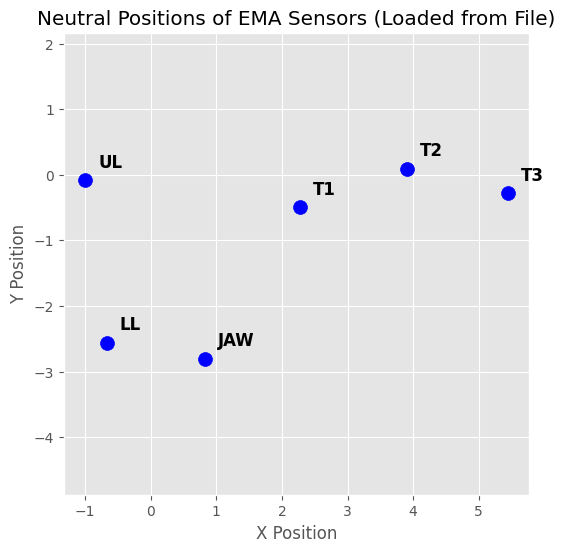

In [8]:

# -----------------------
# Plot
# -----------------------

plt.figure(figsize=(6, 6))
plt.scatter(sensorNeutral[:, 0], sensorNeutral[:, 1], s=100, color='b')
labelOffset = 0.2

for i, label in enumerate(sensorLabels):
    plt.text(sensorNeutral[i, 0] + labelOffset, sensorNeutral[i, 1] + labelOffset,
             label, fontsize=12, fontweight='bold')

plt.title("Neutral Positions of EMA Sensors (Loaded from File)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis('equal')
plt.grid(True)
plt.show()


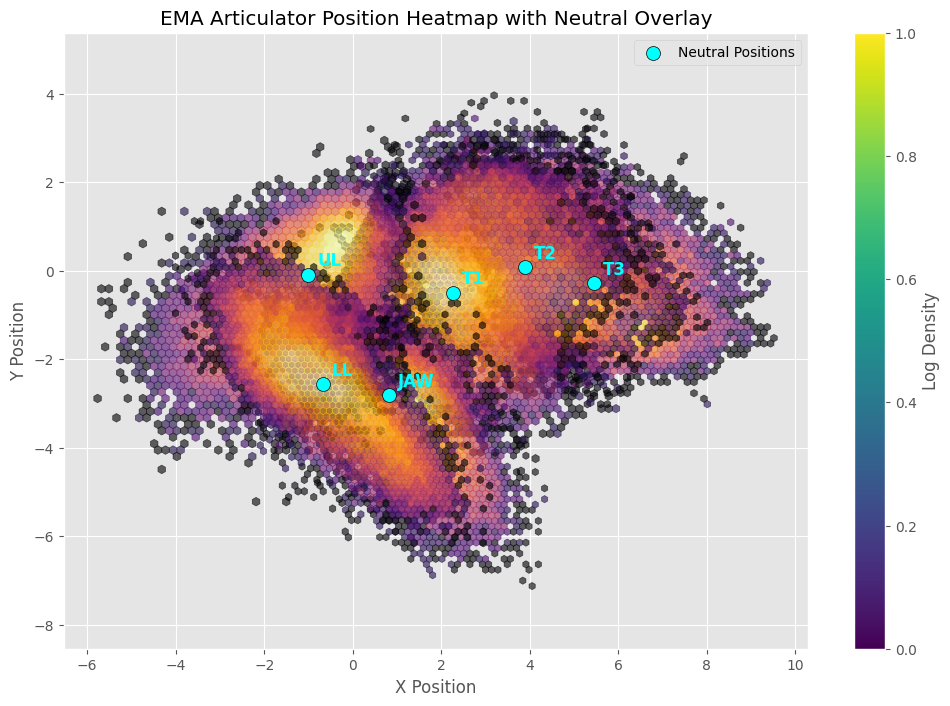

In [11]:

# Set up figure
plt.figure(figsize=(12, 8))

colors = sns.color_palette("husl", len(sensorLabels))


# Plot heatmap for each sensor using hexbin
for i, label in enumerate(sensorLabels):
    x_col = f"{label}_x"
    y_col = f"{label}_y"

    x_data = ema_all[x_col].values + sensorNeutral[i, 0]
    y_data = ema_all[y_col].values + sensorNeutral[i, 1]

    # Use hexbin to plot a density heatmap for the sensor
    plt.hexbin(x_data, y_data, gridsize=50, cmap='inferno', bins='log', alpha=0.6)
    # sns.kdeplot(
    #     x=x_data,
    #     y=y_data,
    #     levels=5,
    #     color=colors[i],
    #     fill=False,
    #     label=label,
    #     linewidths=1.5
    # )

# Overlay neutral positions
plt.scatter(sensorNeutral[:, 0], sensorNeutral[:, 1], s=100, color='cyan', edgecolor='k', zorder=3, label='Neutral Positions')

# Add sensor labels next to neutral positions
labelOffset = 0.2
for i, label in enumerate(sensorLabels):
    plt.text(sensorNeutral[i, 0] + labelOffset, sensorNeutral[i, 1] + labelOffset,
             label, fontsize=12, fontweight='bold', color='cyan')

# Final plot settings
plt.title("EMA Articulator Position Heatmap with Neutral Overlay")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis('equal')
plt.grid(True)
plt.colorbar(label='Log Density')
plt.legend()
plt.show()


In [ ]:
# subtract the jaw from the above data for all positions except the upper lip 
ema_all_nojaw = ema_all.copy()
labelx = [l+"_x" for l in sensorLabels if l not in ['UL']]
labely = [l+"_y" for l in sensorLabels if l not in ['UL']]
ema_all_nojaw[labelx] = ema_all_nojaw[labelx].subtract(ema_all_nojaw['JAW_x'], axis=0)
ema_all_nojaw[labely] = ema_all_nojaw[labely].subtract(ema_all_nojaw['JAW_y'], axis=0)
ema_all_nojaw
#  = ema_all_nojaw[labelx] - ema_all_nojaw['JAW_x']
# ema_all_nojawa

In [ ]:
# Set up figure
plt.figure(figsize=(12, 8))

# Plot heatmap for each sensor using hexbin
for i, label in enumerate(sensorLabels):
    x_col = f"{label}_x"
    y_col = f"{label}_y"

    x_data = ema_all_nojaw[x_col].values + sensorNeutral[i, 0]
    y_data = ema_all_nojaw[y_col].values + sensorNeutral[i, 1]

    # Use hexbin to plot a density heatmap for the sensor
    plt.hexbin(x_data, y_data, gridsize=50, cmap='inferno', bins='log', alpha=0.6)

# Overlay neutral positions
plt.scatter(sensorNeutral[:, 0], sensorNeutral[:, 1], s=100, color='cyan', edgecolor='k', zorder=3, label='Neutral Positions')

# Add sensor labels next to neutral positions
labelOffset = 0.2
for i, label in enumerate(sensorLabels):
    plt.text(sensorNeutral[i, 0] + labelOffset, sensorNeutral[i, 1] + labelOffset,
             label, fontsize=12, fontweight='bold', color='cyan')

# Final plot settings
plt.title("EMA Articulator (minus Jaw) Position Heatmap with Neutral Overlay")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis('equal')
plt.grid(True)
plt.colorbar(label='Log Density')
plt.legend()
plt.show()
